In [2]:
import pandas as pd
import numpy as np

In [13]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

In [14]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [17]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [16]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [18]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [ ]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts
counts = get_counts2(time_zones)
counts['America/New_York']

1251

In [ ]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [19]:


df = pd.DataFrame(records)

clean_tz = df['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
clean_tz.value_counts()[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [23]:
cframe = df.a.dropna()
results = pd.Series([x.split()[0]for x in cframe])


0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

In [26]:
import numpy as np
cframe = df[df.a.notnull()]
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

/tmp/ipykernel_518726/1944807838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')


,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN,Windows
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN,Windows
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN,Not Windows


In [75]:
cframe['os'][:5]
by_tz_os = cframe.groupby(['tz', 'os'])
print(by_tz_os.size().index)
by_tz_os.size()

MultiIndex([(                              '', 'Not Windows'),
            (                              '',     'Windows'),
            (                  'Africa/Cairo',     'Windows'),
            (             'Africa/Casablanca',     'Windows'),
            (                  'Africa/Ceuta',     'Windows'),
            (           'Africa/Johannesburg',     'Windows'),
            (                 'Africa/Lusaka',     'Windows'),
            (             'America/Anchorage', 'Not Windows'),
            (             'America/Anchorage',     'Windows'),
            ('America/Argentina/Buenos_Aires', 'Not Windows'),
            ...
            (                 'Europe/Vienna', 'Not Windows'),
            (                 'Europe/Vienna',     'Windows'),
            (                'Europe/Vilnius',     'Windows'),
            (              'Europe/Volgograd',     'Windows'),
            (                 'Europe/Warsaw', 'Not Windows'),
            (                 'Europe/W

/tmp/ipykernel_518726/4037470307.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cframe['os'][:5]


tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

In [72]:
agg_counts = by_tz_os.size().unstack().fillna(0)
print(agg_counts.sum(0).argsort())
indexer = agg_counts.sum(1).argsort()[-10:]
indexer

os
Not Windows    0
Windows        1
dtype: int64


tz
Europe/Sofia        35
Europe/Stockholm    78
Europe/Uzhgorod     96
Europe/Vienna       59
Europe/Vilnius      77
Europe/Volgograd    15
Europe/Warsaw       22
Europe/Zurich       12
Pacific/Auckland     0
Pacific/Honolulu    29
dtype: int64

In [58]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [59]:
count_subset  = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


In [63]:
grouped = count_subset.groupby('tz')
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group
grouped.apply(norm_total)

/tmp/ipykernel_518726/781991903.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped.apply(norm_total)


,tz,os,total,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,1.000000
6,Asia/Tokyo,Not Windows,2.0,0.054054
7,Asia/Tokyo,Windows,35.0,0.945946
8,Europe/London,Not Windows,43.0,0.581081
9,Europe/London,Windows,31.0,0.418919


In [65]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')
count_subset['normed_total'] = results2
count_subset

,tz,os,total,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,1.000000
6,Asia/Tokyo,Not Windows,2.0,0.054054
7,Asia/Tokyo,Windows,35.0,0.945946
8,Europe/London,Not Windows,43.0,0.581081
9,Europe/London,Windows,31.0,0.418919


<Axes: xlabel='normed_total', ylabel='tz'>

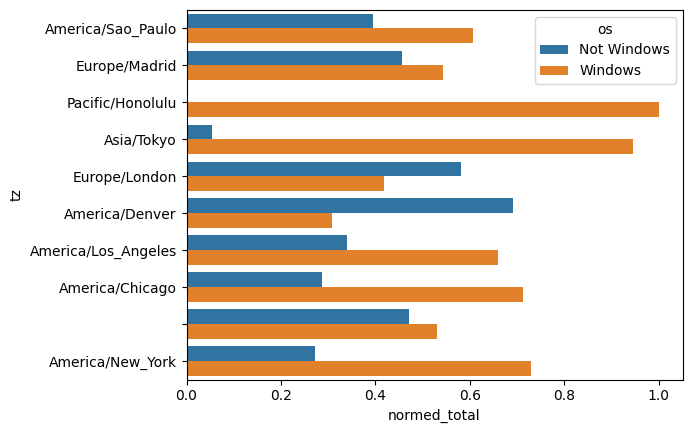

In [77]:
import seaborn as sns
sns.barplot(data=count_subset, x='normed_total', y='tz', hue='os')

In [3]:
ratings = pd.read_csv('datasets/ml-latest-small/ratings.csv')
# print(ratings)
movies = pd.read_table('datasets/ml-latest-small/movies.csv', sep=",")
# print(movies)
tags = pd.read_table('datasets/ml-latest-small/tags.csv', sep=",")
print(tags)

data = pd.merge(movies, ratings)
data

      userId  movieId               tag   timestamp
0          2    60756             funny  1445714994
1          2    60756   Highly quotable  1445714996
2          2    60756      will ferrell  1445714992
3          2    89774      Boxing story  1445715207
4          2    89774               MMA  1445715200
...      ...      ...               ...         ...
3678     606     7382         for katie  1171234019
3679     606     7936           austere  1173392334
3680     610     3265            gun fu  1493843984
3681     610     3265  heroic bloodshed  1493843978
3682     610   168248  Heroic Bloodshed  1493844270

[3683 rows x 4 columns]


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [6]:
genres = movies.genres
all_genres = []
for genre in genres:
  if not genre or genre == '':
    continue
  all_genres.extend(genre.split("|"))
all_genres = pd.unique(all_genres)
all_genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [9]:
zero_matrix = np.zeros((len(movies), len(all_genres)))
dummies = pd.DataFrame(zero_matrix, columns=all_genres)

for i, gen in enumerate(movies.genres):
  indices = dummies.columns.get_indexer(gen.split('|'))
  dummies.iloc[i, indices] = 1

movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic

,movieId,title,genres,Genre_Adventure,Genre_Animation,Genre_Children,Genre_Comedy,Genre_Fantasy,Genre_Romance,Genre_Drama,...,Genre_Horror,Genre_Mystery,Genre_Sci-Fi,Genre_War,Genre_Musical,Genre_Documentary,Genre_IMAX,Genre_Western,Genre_Film-Noir,Genre_(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9739,193585,Flint (2017),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
np.random.seed(12346)
arr = np.random.randn(5, 5)
arr

array([[-8.99822478e-02,  7.59372617e-01,  7.48336101e-01,
        -9.81497953e-01,  3.65775545e-01],
       [-3.15442628e-01, -8.66135605e-01,  2.78568155e-02,
        -4.55597723e-01, -1.60189223e+00],
       [ 2.48256116e-01, -3.21536673e-01, -8.48730755e-01,
         4.60468309e-04, -5.46459347e-01],
       [ 2.53915229e-01,  1.93684246e+00, -7.99504902e-01,
        -5.69159281e-01,  4.89244731e-02],
       [-6.49092950e-01, -4.79535727e-01, -9.53521432e-01,
         1.42253882e+00,  1.75403128e-01]])

In [13]:
arr[::2].sort(1)
arr

array([[-9.81497953e-01, -8.99822478e-02,  3.65775545e-01,
         7.48336101e-01,  7.59372617e-01],
       [-3.15442628e-01, -8.66135605e-01,  2.78568155e-02,
        -4.55597723e-01, -1.60189223e+00],
       [-8.48730755e-01, -5.46459347e-01, -3.21536673e-01,
         4.60468309e-04,  2.48256116e-01],
       [ 2.53915229e-01,  1.93684246e+00, -7.99504902e-01,
        -5.69159281e-01,  4.89244731e-02],
       [-9.53521432e-01, -6.49092950e-01, -4.79535727e-01,
         1.75403128e-01,  1.42253882e+00]])

In [16]:
arr[:, :1]


array([[-0.98149795],
       [-0.31544263],
       [-0.84873075],
       [ 0.25391523],
       [-0.95352143]])

In [17]:
arr[:, 1:]


array([[-8.99822478e-02,  3.65775545e-01,  7.48336101e-01,
         7.59372617e-01],
       [-8.66135605e-01,  2.78568155e-02, -4.55597723e-01,
        -1.60189223e+00],
       [-5.46459347e-01, -3.21536673e-01,  4.60468309e-04,
         2.48256116e-01],
       [ 1.93684246e+00, -7.99504902e-01, -5.69159281e-01,
         4.89244731e-02],
       [-6.49092950e-01, -4.79535727e-01,  1.75403128e-01,
         1.42253882e+00]])

In [23]:
arr[:, :1] < arr[:, 1:]

array([[ True,  True,  True,  True],
       [False,  True, False, False],
       [ True,  True,  True,  True],
       [ True, False, False, False],
       [ True,  True,  True,  True]])

In [28]:
data.groupby(['movieId', 'title'])['rating'].agg(['count','mean', 'sum'])

,,count,mean,sum
movieId,title,,,
1,Toy Story (1995),215,3.920930,843.0
2,Jumanji (1995),110,3.431818,377.5
3,Grumpier Old Men (1995),52,3.259615,169.5
4,Waiting to Exhale (1995),7,2.357143,16.5
5,Father of the Bride Part II (1995),49,3.071429,150.5
...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),1,4.000000,4.0
193583,No Game No Life: Zero (2017),1,3.500000,3.5
193585,Flint (2017),1,3.500000,3.5


In [41]:
ratings_by_movieId = data.groupby(['movieId']).size()
ratings_by_movieId = ratings_by_movieId[ratings_by_movieId > 100]
data.loc[ratings_by_movieId]

,movieId,title,genres,userId,rating,timestamp
215,2,Jumanji (1995),Adventure|Children|Fantasy,6,4.0,845553522
110,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,293,3.0,1044870886
102,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,279,3.0,1506394495
132,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,372,3.0,874416443
177,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,517,4.0,1487954343
...,...,...,...,...,...,...
107,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,290,4.0,975031464
149,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,432,2.5,1316391457
104,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,282,4.5,1378495714
105,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,283,3.0,901227602
